<a href="https://colab.research.google.com/github/Nov05/yelp-dataset-challenge/blob/master/notebooks/2019_12_05_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-12-06

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Documentation   
https://www.yelp.com/dataset/documentation/main   

# checkin.csv

In [10]:
# can't read large files via shareable links
url = "https://drive.google.com/open?id=1-0B2vGj7S9lF8s42jzj1mD0V0xLtp6U2" 
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/checkin.csv"
df_checkin = pd.read_csv(path)
print(df_checkin.shape)
df_checkin.head()
# there are 192,609 businesses in total

(161950, 2)


,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


# business.csv

In [5]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/business.csv"
df_business = pd.read_csv(path)
print(df_business.shape)
df_business.head()
# there are 192,609 businesses in total

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(192609, 60)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.GoodForMeal,attributes.BusinessParking,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.Ambience,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.BusinessAcceptsCreditCards,attributes,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.Music,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.BestNights,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.Corkage,attributes.BYOB,attributes.DietaryRestrictions,attributes.Open24Hours,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,17:30-21:30,NaN,17:30-21:30,17:30-21:30,17:30-22:0,17:30-22:0,17:30-21:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# DtypeWarning: Columns (56,58,59) have mixed types. 
# Specify dtype option on import or set low_memory=False.
df_business.iloc[:,59].value_counts()

True     8
False    3
Name: attributes.RestaurantsCounterService, dtype: int64

# photo.csv

In [13]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/photo.csv"
df_photo = pd.read_csv(path, lineterminator='\n')
print(df_photo.shape)
df_photo.head()

(200000, 4)


,caption,photo_id,business_id,label
0,NaN,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,NaN,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,NaN,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,NaN,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,NaN,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


In [17]:
# half of the photos have a caption
df_photo['caption'].value_counts(dropna=False)

NaN                                                                    107850
Interior                                                                  458
Inside                                                                    388
Menu                                                                      321
McDonald's All Day Breakfast Sandwiches                                   298
                                                                        ...  
Shinya Way to Heaven Ramen                                                  1
A Forest Hill tradition for more than 52 years...and still going...         1
Miss Korea Dishes                                                           1
All our free drinks thanks to our host!                                     1
Famous Baked Wings                                                          1
Name: caption, Length: 71513, dtype: int64

In [18]:
# there are 200,000 photos in total,
# and about half of them have a caption.
df_photo['label'].value_counts(dropna=False)

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64

In [23]:
# there are about 57,151 photos about food and with a caption.
# probably need to do some basic NLP to convert captions to labels.
df_photo[df_photo['caption'].notnull()]['label'].value_counts()

food       57151
inside     20790
drink       8382
outside     4485
menu        1342
Name: label, dtype: int64

In [26]:
print(30488/192609)
df_photo['business_id'].value_counts()
# there are 192,609 businesses in total
# only 30,488 businesses (15%) have photos
# whether having photos could a feature
# or we could compare businesses with photos with those without 
# any to see whether having photos would make difference

0.15828959186746205


RESDUcs7fIiihp38-d6_6g    823
K7lWdNUhCbcnEvI0NhGewg    642
vHz2RLtfUMVRPFmd7VBEHA    612
faPVqws-x-5k2CQKDNtHxw    421
XnJeadLrlj9AZB8qSdIR2Q    329
                         ... 
KB1mmr0_LVr0qglMCF4_qA      1
XVxReat5L3dgeBTlR64ufA      1
q80WmfxmifLBdB8_rPYu1w      1
kgmVm_ZbJsJpSye27xccvg      1
mbPaXByWZBZUGqvh8ewmTA      1
Name: business_id, Length: 30488, dtype: int64

# tip.csv

In [4]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/tip.csv"
df_tip = pd.read_csv(path, lineterminator='\n')
print(df_tip.shape)
df_tip.head()
# tip text could make use of NLP

(1223094, 5)


,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


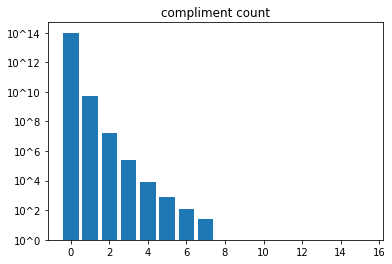

In [79]:
from matplotlib.ticker import FormatStrFormatter
df_tmp = df_tip['compliment_count']\
    .value_counts().reset_index().sort_values('index')
fig, ax = plt.subplots()
ax.bar(df_tmp['index'], np.log(df_tmp['compliment_count']))
ax.yaxis.set_major_formatter(FormatStrFormatter('10^%.0f'))
ax.set_title("compliment count");

In [81]:
print(df_tip['business_id'].value_counts())
print(123997/192609)
# there are 192,609 businesses in total
# there are 123,997 tips, covered 64% businesses

FaHADZARwnY4yvlvpnsfGA    3614
JmI9nslLD7KZqRr__Bg6NQ    2440
DkYS3arLOhA8si5uUEmHOw    1503
5LNZ67Yw9RD6nf4_UhXOjw    1487
K7lWdNUhCbcnEvI0NhGewg    1386
                          ... 
Cqc8MHqO_E3nBVb3CBE82A       1
tCBEnRW8waVRFtXUq6onFg       1
Eu4JwXc2logjyOAoaqzYAg       1
M6KM77IZG9MWxV8_036iUQ       1
wZKoVgE6PC83uCYlm0jk7g       1
Name: business_id, Length: 123997, dtype: int64
0.6437757321828159


# user.csv

In [80]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/user.csv"
df_user = pd.read_csv(path, lineterminator='\n')
print(df_user.shape)
df_user.head()
# the 'friends' column has interesting information
# compliment sentiment columns could be helpful

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1637138, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,NaN,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,NaN,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,NaN,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


# review.csv

In [82]:
# the size of review.csv is about 4.39 GB
# it is the largest among the text datasets
# it takes long time to loan from Google Drive
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/review.csv"
df_review = pd.read_csv(path, lineterminator='\n')
print(df_review.shape)
df_review.head()
# there are 6,685,900 reviews

(6685900, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [84]:
print(df_review['user_id'].value_counts())
# there are 1,637,138 users who have left reviews
# there are 1,637,138 users in total in user.csv
# Google says "142 million unique visitors per month"
# less, maybe far less, than 1% users would leave a review
# user.csv data actually comes from review.csv data
# review text will be the focus of NLP

CxDOIDnH8gp9KXzpBHJYXw    4129
bLbSNkLggFnqwNNzzq-Ijw    2354
PKEzKWv_FktMm2mGPjwd0Q    1822
ELcQDlf69kb-ihJfxZyL0A    1764
DK57YibC5ShBmqQl97CKog    1727
                          ... 
zqQX8Rwvp5WiUlST97geZA       1
O9_DfV3byybxAT3l5JDcAw       1
8W07Z4WlVhDJfOkvZYDgPw       1
XgXczqCESaSXxh8WKtSKRw       1
zaS40KWRyDlGam9Zwe5jNg       1
Name: user_id, Length: 1637138, dtype: int64
